In [0]:
import pandas as pd
import numpy as np
import datetime

In [0]:
data = pd.read_csv('loan.csv', nrows = 10000) 
data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
    

In [0]:
data = data[['issue_d', 'last_pymnt_d']]
data.head()

,issue_d,last_pymnt_d
0,Dec-2011,Jan-2015
1,Dec-2011,Apr-2013
2,Dec-2011,Jun-2014
3,Dec-2011,Jan-2015
4,Dec-2011,Jan-2016


In [0]:
data.dtypes

issue_d         object
last_pymnt_d    object
dtype: object

Now we will parse the dates into datetime format


In [0]:
data['issue_dt'] = pd.to_datetime(data.issue_d)
data['last_pymnt_dt'] = pd.to_datetime(data.last_pymnt_d)
data.head()

,issue_d,last_pymnt_d,issue_dt,last_pymnt_dt
0,Dec-2011,Jan-2015,2011-12-01,2015-01-01
1,Dec-2011,Apr-2013,2011-12-01,2013-04-01
2,Dec-2011,Jun-2014,2011-12-01,2014-06-01
3,Dec-2011,Jan-2015,2011-12-01,2015-01-01
4,Dec-2011,Jan-2016,2011-12-01,2016-01-01


In [0]:
data.dtypes

issue_d                  object
last_pymnt_d             object
issue_dt         datetime64[ns]
last_pymnt_dt    datetime64[ns]
dtype: object

**Extract days**

In [0]:
# Day 1 ~ 31
data['issue_dt_day'] = data.issue_dt.dt.day
data[['issue_dt', 'issue_dt_day']].head()

,issue_dt,issue_dt_day
0,2011-12-01,1
1,2011-12-01,1
2,2011-12-01,1
3,2011-12-01,1
4,2011-12-01,1


In [0]:
# Day of Week - from 0 to 6
data['issue_dt_dayofweek'] = data.issue_dt.dt.dayofweek
data[['issue_dt', 'issue_dt_dayofweek']].head()

,issue_dt,issue_dt_dayofweek
0,2011-12-01,3
1,2011-12-01,3
2,2011-12-01,3
3,2011-12-01,3
4,2011-12-01,3


In [0]:
# Daynames of the week
data['issue_dt_dayofweek'] = data.issue_dt.dt.weekday_name
data[['issue_dt', 'issue_dt_dayofweek']].head()

,issue_dt,issue_dt_dayofweek
0,2011-12-01,Thursday
1,2011-12-01,Thursday
2,2011-12-01,Thursday
3,2011-12-01,Thursday
4,2011-12-01,Thursday


In [0]:
# Find weekend

data['issue_dt_is_weekend'] = np.where(data.issue_dt_dayofweek.isin(['Sunday','Saturday']), 1, 0)
data[['issue_dt', 'issue_dt_dayofweek', 'issue_dt_is_weekend']].head()

,issue_dt,issue_dt_dayofweek,issue_dt_is_weekend
0,2011-12-01,Thursday,0
1,2011-12-01,Thursday,0
2,2011-12-01,Thursday,0
3,2011-12-01,Thursday,0
4,2011-12-01,Thursday,0


**Extract Week**

In [0]:
# We will extract weeks from date, varis from 1 to 52.
data['issue_dt_week'] = data.issue_dt.dt.week
data[['issue_dt', 'issue_dt_week']].()

,issue_dt,issue_dt_week
0,2011-12-01,48
1,2011-12-01,48
2,2011-12-01,48
3,2011-12-01,48
4,2011-12-01,48


**Extract Months**

In [0]:
# Extracting month from date varis from 1 to 12.
data['issue_dt_month'] = data.issue_dt.dt.month
data[['issue_dt', 'issue_dt_month']].head()

,issue_dt,issue_dt_month
0,2011-12-01,12
1,2011-12-01,12
2,2011-12-01,12
3,2011-12-01,12
4,2011-12-01,12


**Extract Quarter**

In [0]:
# Extract quarter from date variable 1 to 4
data['issue_dt_quarter'] = data['issue_dt'].dt.quarter
data[['issue_dt', 'issue_dt_quarter']].head()

,issue_dt,issue_dt_quarter
0,2011-12-01,4
1,2011-12-01,4
2,2011-12-01,4
3,2011-12-01,4
4,2011-12-01,4


**Extract Semester**

In [0]:
# We could also extract semester
data['issue_dt_semester'] = np.where(data.issue_dt_quarter.isin([1,2]), 1, 2)
print(data.head())
print(data.issue_dt_semester.unique())

    issue_d last_pymnt_d  ... issue_dt_quarter issue_dt_semester
0  Dec-2011     Jan-2015  ...                4                 2
1  Dec-2011     Apr-2013  ...                4                 2
2  Dec-2011     Jun-2014  ...                4                 2
3  Dec-2011     Jan-2015  ...                4                 2
4  Dec-2011     Jan-2016  ...                4                 2

[5 rows x 8 columns]
[2]


**Extract Year**

In [0]:
data['issue_dt_year'] = data.issue_dt.dt.year
data[['issue_dt', 'issue_dt_year']].head()

,issue_dt,issue_dt_year
0,2011-12-01,2011
1,2011-12-01,2011
2,2011-12-01,2011
3,2011-12-01,2011
4,2011-12-01,2011


**Exact Time elapsed between dates**

In [0]:
# The date difference between 2 dates
(data.issue_dt - data.last_pymnt_dt).head()

0   -1127 days
1    -487 days
2    -913 days
3   -1127 days
4   -1492 days
dtype: timedelta64[ns]

In [0]:
(data.last_pymnt_dt - data.issue_dt).dt.days.head()

0    1127.0
1     487.0
2     913.0
3    1127.0
4    1492.0
dtype: float64

In [0]:
# Calculate number of months passed between 2 dates
data['months_passed'] = (data.last_pymnt_dt - data.issue_dt) / np.timedelta64(1, 'M')
data['months_passed'] = np.round(data.months_passed, 0)
data[['last_pymnt_dt','issue_dt', 'months_passed']].head()

,last_pymnt_dt,issue_dt,months_passed
0,2015-01-01,2011-12-01,37.0
1,2013-04-01,2011-12-01,16.0
2,2014-06-01,2011-12-01,30.0
3,2015-01-01,2011-12-01,37.0
4,2016-01-01,2011-12-01,49.0


In [0]:
(datetime.datetime.today() - data.issue_dt).head()

0   3041 days 00:41:24.942309
1   3041 days 00:41:24.942309
2   3041 days 00:41:24.942309
3   3041 days 00:41:24.942309
4   3041 days 00:41:24.942309
Name: issue_dt, dtype: timedelta64[ns]

**Extract the hour, minute and second**

In [0]:
date = pd.Series(pd.date_range('2015-1-5 11:20:00', periods=7, freq = 'H'))
df = pd.DataFrame(dict(date=date))
df['hour'] = df.date.dt.hour
df['min'] = df.date.dt.minute
df['sec'] = df.date.dt.second
df

,date,hour,min,sec
0,2015-01-05 11:20:00,11,20,0
1,2015-01-05 12:20:00,12,20,0
2,2015-01-05 13:20:00,13,20,0
3,2015-01-05 14:20:00,14,20,0
4,2015-01-05 15:20:00,15,20,0
5,2015-01-05 16:20:00,16,20,0
6,2015-01-05 17:20:00,17,20,0


**ExtractTime Part**

In [0]:
df['time'] = df.date.dt.time
df

,date,hour,min,sec,time
0,2015-01-05 11:20:00,11,20,0,11:20:00
1,2015-01-05 12:20:00,12,20,0,12:20:00
2,2015-01-05 13:20:00,13,20,0,13:20:00
3,2015-01-05 14:20:00,14,20,0,14:20:00
4,2015-01-05 15:20:00,15,20,0,15:20:00
5,2015-01-05 16:20:00,16,20,0,16:20:00
6,2015-01-05 17:20:00,17,20,0,17:20:00


**Extract hour, minute, second at the same time**

In [0]:
df[['h', 'm', 's']] = pd.DataFrame([(x.hour, x.minute, x.second) for x in df.time])
df

,date,hour,min,sec,time,h,m,s
0,2015-01-05 11:20:00,11,20,0,11:20:00,11,20,0
1,2015-01-05 12:20:00,12,20,0,12:20:00,12,20,0
2,2015-01-05 13:20:00,13,20,0,13:20:00,13,20,0
3,2015-01-05 14:20:00,14,20,0,14:20:00,14,20,0
4,2015-01-05 15:20:00,15,20,0,15:20:00,15,20,0
5,2015-01-05 16:20:00,16,20,0,16:20:00,16,20,0
6,2015-01-05 17:20:00,17,20,0,17:20:00,17,20,0


**Calculate time difference**

In [0]:
date1 = pd.Series(pd.date_range('2012-1-1 12:00:00', periods=7, freq='M'))
date2 = pd.Series(pd.date_range('2013-3-11 21:45:00', periods=7, freq='W'))

df = pd.DataFrame(dict(Start_date = date1, End_date = date2))
df

,Start_date,End_date
0,2012-01-31 12:00:00,2013-03-17 21:45:00
1,2012-02-29 12:00:00,2013-03-24 21:45:00
2,2012-03-31 12:00:00,2013-03-31 21:45:00
3,2012-04-30 12:00:00,2013-04-07 21:45:00
4,2012-05-31 12:00:00,2013-04-14 21:45:00
5,2012-06-30 12:00:00,2013-04-21 21:45:00
6,2012-07-31 12:00:00,2013-04-28 21:45:00


In [0]:
# Let's calculate the time elapsed in seconds 
df['diff_seconds'] = df['End_date'] - df['Start_date']
df['diff_seconds'] = df['diff_seconds'] / np.timedelta64(1, 's')
df

,Start_date,End_date,diff_seconds
0,2012-01-31 12:00:00,2013-03-17 21:45:00,35545500.0
1,2012-02-29 12:00:00,2013-03-24 21:45:00,33644700.0
2,2012-03-31 12:00:00,2013-03-31 21:45:00,31571100.0
3,2012-04-30 12:00:00,2013-04-07 21:45:00,29583900.0
4,2012-05-31 12:00:00,2013-04-14 21:45:00,27510300.0
5,2012-06-30 12:00:00,2013-04-21 21:45:00,25523100.0
6,2012-07-31 12:00:00,2013-04-28 21:45:00,23449500.0


In [0]:
# Let's calculate the time elapsed in seconds 
df['diff_seconds'] = df['End_date'] - df['Start_date']
df['diff_seconds'] = df['diff_seconds'] / np.timedelta64(1, 'm')
df

,Start_date,End_date,diff_seconds
0,2012-01-31 12:00:00,2013-03-17 21:45:00,592425.0
1,2012-02-29 12:00:00,2013-03-24 21:45:00,560745.0
2,2012-03-31 12:00:00,2013-03-31 21:45:00,526185.0
3,2012-04-30 12:00:00,2013-04-07 21:45:00,493065.0
4,2012-05-31 12:00:00,2013-04-14 21:45:00,458505.0
5,2012-06-30 12:00:00,2013-04-21 21:45:00,425385.0
6,2012-07-31 12:00:00,2013-04-28 21:45:00,390825.0


**Let's construct a timedelta object, the other major data type from the datetime module:**

In [3]:
td = datetime.timedelta(weeks=2, days=5, hours=10, minutes=20, seconds=6.73,
                        milliseconds=99, microseconds=8)
td

datetime.timedelta(19, 37206, 829008)

**Let's turn to pandas Timestamp object, which is a moment in time with nanosecond precision. The Timestamp constructor is very flexible and handles a wide variety of inputs**

In [4]:
pd.Timestamp(year=2012, month=12, day=21, hour=5, minute=10, second=8, microsecond=99)

Timestamp('2012-12-21 05:10:08.000099')

In [5]:
pd.Timestamp('2016/1/10')

Timestamp('2016-01-10 00:00:00')

In [6]:
pd.Timestamp('2014-5/10')

Timestamp('2014-05-10 00:00:00')

In [7]:
pd.Timestamp('Jan 3, 2019 20:45.56')

Timestamp('2019-01-03 20:45:33')

In [8]:
pd.Timestamp(500, unit = 'D')

Timestamp('1971-05-16 00:00:00')

In [10]:
s = pd.Series([10, 100, 1000, 10000])
pd.to_datetime(s, unit='D')

0   1970-01-11
1   1970-04-11
2   1972-09-27
3   1997-05-19
dtype: datetime64[ns]

**TimeDelta**

In [11]:
pd.Timedelta('12 days 5 hours 3 minutes')

Timedelta('12 days 05:03:00')

In [12]:
pd.Timedelta(days=5, minutes=7.34)

Timedelta('5 days 00:07:20.400000')

In [13]:
pd.Timedelta(100, unit = 'W')

Timedelta('700 days 00:00:00')

In [14]:
s = pd.Series([10, 100])
pd.to_timedelta(s, unit = 's')

0   00:00:10
1   00:01:40
dtype: timedelta64[ns]

# **Slicing Time Series**

In [123]:
crime = pd.read_hdf('crime.h5')
crime.dtypes

OFFENSE_TYPE_ID              category
OFFENSE_CATEGORY_ID          category
REPORTED_DATE          datetime64[ns]
GEO_LON                       float64
GEO_LAT                       float64
NEIGHBORHOOD_ID              category
IS_CRIME                        int64
IS_TRAFFIC                      int64
dtype: object

In [124]:
crime = crime.set_index('REPORTED_DATE')
crime.head()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2014-06-29 02:01:00,traffic-accident-dui-duid,traffic-accident,-105.000149,39.745753,cbd,0,1
2014-06-29 01:54:00,vehicular-eluding-no-chase,all-other-crimes,-104.884660,39.738702,east-colfax,1,0
2014-06-29 02:00:00,disturbing-the-peace,public-disorder,-105.020719,39.706674,athmar-park,1,0
2014-06-29 02:18:00,curfew,public-disorder,-105.001552,39.769505,sunnyside,1,0
2014-06-29 04:17:00,aggravated-assault,aggravated-assault,-105.018557,39.679229,college-view-south-platte,1,0


In [21]:
# Select all the rows equal to a single index by passing that value to the .loc attribute:
crime.loc['2016-05-12 16:45:00']

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2016-05-12 16:45:00,traffic-accident,traffic-accident,-104.847024,39.779596,montbello,0,1
2016-05-12 16:45:00,traffic-accident,traffic-accident,-105.049180,39.769296,west-highland,0,1
2016-05-12 16:45:00,fraud-identity-theft,white-collar-crime,-104.931971,39.717359,hilltop,1,0


In [26]:
# With a Timestamp in the index, it is possible to select all rows that partially match as index value.
crime.loc['2016-05-12'].shape

(243, 7)

In [29]:
crime.loc['2016-05'].shape, crime.loc['2016'].shape

((8012, 7), (91076, 7))

In [32]:
# the selection strings may also contain the mane of the month:
crime.loc['Dec 2015'].sort_index().head()
# crime.loc['2016 Sep, 15']
# crime.loc['21st October 2014 05']

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2015-12-01 00:48:00,drug-cocaine-possess,drug-alcohol,-104.891681,39.740155,east-colfax,1,0
2015-12-01 00:48:00,theft-of-motor-vehicle,auto-theft,-104.891681,39.740155,east-colfax,1,0
2015-12-01 01:00:00,criminal-mischief-other,public-disorder,-104.993574,39.739773,civic-center,1,0
2015-12-01 01:10:00,traf-other,all-other-crimes,-104.995496,39.725618,baker,1,0
2015-12-01 01:10:00,traf-habitual-offender,all-other-crimes,-104.995496,39.725618,baker,1,0


In [33]:
# We may use the slice notation to select a precise range of data.
crime.loc['2015-3-4':'2016-1-1'].sort_index().head()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2015-03-04 00:11:00,assault-dv,other-crimes-against-persons,-105.021966,39.770883,sunnyside,1,0
2015-03-04 00:19:00,assault-dv,other-crimes-against-persons,-104.978988,39.748799,five-points,1,0
2015-03-04 00:27:00,theft-of-services,larceny,-105.055082,39.790564,regis,1,0
2015-03-04 00:49:00,traffic-accident-hit-and-run,traffic-accident,-104.987454,39.701378,washington-park-west,0,1
2015-03-04 01:07:00,burglary-business-no-force,burglary,-105.010843,39.762538,highland,1,0


# **Filtering columns with time data**

In [40]:
# Select all the rows where the REPORTED_DATE columns has a certine value
crime[crime['REPORTED_DATE'] == '2016-05-12 16:45:00']

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,REPORTED_DATE,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
300905,traffic-accident,traffic-accident,2016-05-12 16:45:00,-104.847024,39.779596,montbello,0,1
302354,traffic-accident,traffic-accident,2016-05-12 16:45:00,-105.049180,39.769296,west-highland,0,1
302373,fraud-identity-theft,white-collar-crime,2016-05-12 16:45:00,-104.931971,39.717359,hilltop,1,0


In [41]:
# Select all rows with a partial date match. If we try this with the equality operator, it fails. We do not get an error, but there are no rows retured:
crime[crime.REPORTED_DATE == '2016-05-12']

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,REPORTED_DATE,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC


In [42]:
# This is also fail if we try and compare to the .dt.date attribute. 
crime[crime.REPORTED_DATE.dt.date == '2016-05-12']

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,REPORTED_DATE,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC


In [45]:
# If we want a partial date match, we can use the .between method
crime[crime.REPORTED_DATE.between('2016-05-12', '2016-05-13')].head()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,REPORTED_DATE,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
295715,criminal-mischief-other,public-disorder,2016-05-12 23:51:00,-105.017241,39.705845,athmar-park,1,0
296474,liquor-possession,drug-alcohol,2016-05-12 18:40:00,-104.995692,39.747875,cbd,1,0
297204,traffic-accident,traffic-accident,2016-05-12 22:26:00,-104.880037,39.777037,stapleton,0,1
299383,theft-bicycle,larceny,2016-05-12 20:35:00,-104.929350,39.763797,northeast-park-hill,1,0
299389,theft-of-motor-vehicle,auto-theft,2016-05-12 09:39:00,-104.941233,39.775510,elyria-swansea,1,0


In [49]:
# .between supports partial date strings
crime[crime.REPORTED_DATE.between('2016-05', '2016-06')].shape, crime[crime.REPORTED_DATE.between('2016', '2017')].shape, crime[crime.REPORTED_DATE.between('2016 Sep, 15', '2016 Sep,16')].shape

((8012, 8), (91076, 8), (252, 8))

#**Methods that only work with a DatetimeIndex**

In [54]:
# Use .between_time method to select all crimes that occurred between 2 A.M. adn 5 A.M.
crime.between_time('2:00', '5:00', include_end=False).head()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2014-06-29 02:01:00,traffic-accident-dui-duid,traffic-accident,-105.000149,39.745753,cbd,0,1
2014-06-29 02:00:00,disturbing-the-peace,public-disorder,-105.020719,39.706674,athmar-park,1,0
2014-06-29 02:18:00,curfew,public-disorder,-105.001552,39.769505,sunnyside,1,0
2014-06-29 04:17:00,aggravated-assault,aggravated-assault,-105.018557,39.679229,college-view-south-platte,1,0
2014-06-29 04:22:00,violation-of-restraining-order,all-other-crimes,-104.972447,39.739449,cheesman-park,1,0


In [55]:
#Select all dates at a specific time with .at_time:
crime.at_time('5:47').head()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2013-11-26 05:47:00,criminal-mischief-other,public-disorder,-104.991476,39.751536,cbd,1,0
2017-04-09 05:47:00,criminal-mischief-mtr-veh,public-disorder,-104.959394,39.678425,university,1,0
2017-02-19 05:47:00,criminal-mischief-other,public-disorder,-104.986767,39.741336,north-capitol-hill,1,0
2017-02-16 05:47:00,aggravated-assault,aggravated-assault,-104.934029,39.732320,hale,1,0
2017-02-12 05:47:00,police-interference,all-other-crimes,-104.976306,39.722644,speer,1,0


In [58]:
# The .first() methods prodive an elegent way of selecting the first n segments of time. These segments of time are represented by DateOffset object that can 
# be in the pd.offsets module. The DataFrame must be sorted on its index to guarantee that this method will work.
crime_sort = crime.sort_index()
crime_sort.first(pd.offsets.MonthBegin(6)).head()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 00:06:00,aggravated-assault,aggravated-assault,-104.816860,39.796717,montbello,1,0
2012-01-02 00:06:00,violation-of-restraining-order,all-other-crimes,-104.816860,39.796717,montbello,1,0
2012-01-02 00:16:00,traffic-accident-dui-duid,traffic-accident,-104.971851,39.736874,cheesman-park,0,1
2012-01-02 00:47:00,traffic-accident,traffic-accident,-104.951824,39.740168,congress-park,0,1
2012-01-02 01:35:00,aggravated-assault,aggravated-assault,-104.998131,39.749922,union-station,1,0


In [60]:
# Previous method captures the data from January through June but also selected a single row in July. Let's use MonthEnd, a slightly different offset:
crime_sort.first(pd.offsets.MonthEnd(6)).head()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 00:06:00,aggravated-assault,aggravated-assault,-104.816860,39.796717,montbello,1,0
2012-01-02 00:06:00,violation-of-restraining-order,all-other-crimes,-104.816860,39.796717,montbello,1,0
2012-01-02 00:16:00,traffic-accident-dui-duid,traffic-accident,-104.971851,39.736874,cheesman-park,0,1
2012-01-02 00:47:00,traffic-accident,traffic-accident,-104.951824,39.740168,congress-park,0,1
2012-01-02 01:35:00,aggravated-assault,aggravated-assault,-104.998131,39.749922,union-station,1,0


In [61]:
# The previous method captured nearly the same amount of data but if you look closely, only a single row from June 30th was captured. Again, this is because the time component of 
# of the first index was preserved. The exact search went to 20120-06030 00:05:00. So how do we get exactly six months of data? 
crime_sort.first(pd.offsets.MonthBegin(6, normalize=True)).head()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 00:06:00,aggravated-assault,aggravated-assault,-104.816860,39.796717,montbello,1,0
2012-01-02 00:06:00,violation-of-restraining-order,all-other-crimes,-104.816860,39.796717,montbello,1,0
2012-01-02 00:16:00,traffic-accident-dui-duid,traffic-accident,-104.971851,39.736874,cheesman-park,0,1
2012-01-02 00:47:00,traffic-accident,traffic-accident,-104.951824,39.740168,congress-park,0,1
2012-01-02 01:35:00,aggravated-assault,aggravated-assault,-104.998131,39.749922,union-station,1,0


In [63]:
crime_sort.loc[:'2012-06'].head()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 00:06:00,aggravated-assault,aggravated-assault,-104.816860,39.796717,montbello,1,0
2012-01-02 00:06:00,violation-of-restraining-order,all-other-crimes,-104.816860,39.796717,montbello,1,0
2012-01-02 00:16:00,traffic-accident-dui-duid,traffic-accident,-104.971851,39.736874,cheesman-park,0,1
2012-01-02 00:47:00,traffic-accident,traffic-accident,-104.951824,39.740168,congress-park,0,1
2012-01-02 01:35:00,aggravated-assault,aggravated-assault,-104.998131,39.749922,union-station,1,0


There are a dozen of DateOffset objects for moving forward or backward to the next nearest offset. Instead of hunting down the DateOffset objects in pd.offsets, we can use a string called offset alias instead.

In [65]:
# Datas of first 5 days
crime_sort.first('5D').head()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 00:06:00,aggravated-assault,aggravated-assault,-104.816860,39.796717,montbello,1,0
2012-01-02 00:06:00,violation-of-restraining-order,all-other-crimes,-104.816860,39.796717,montbello,1,0
2012-01-02 00:16:00,traffic-accident-dui-duid,traffic-accident,-104.971851,39.736874,cheesman-park,0,1
2012-01-02 00:47:00,traffic-accident,traffic-accident,-104.951824,39.740168,congress-park,0,1
2012-01-02 01:35:00,aggravated-assault,aggravated-assault,-104.998131,39.749922,union-station,1,0


In [67]:
# Datas of first 5 busienss days
crime_sort.first('5B').head()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 00:06:00,aggravated-assault,aggravated-assault,-104.816860,39.796717,montbello,1,0
2012-01-02 00:06:00,violation-of-restraining-order,all-other-crimes,-104.816860,39.796717,montbello,1,0
2012-01-02 00:16:00,traffic-accident-dui-duid,traffic-accident,-104.971851,39.736874,cheesman-park,0,1
2012-01-02 00:47:00,traffic-accident,traffic-accident,-104.951824,39.740168,congress-park,0,1
2012-01-02 01:35:00,aggravated-assault,aggravated-assault,-104.998131,39.749922,union-station,1,0


In [68]:
# Datas of first 7 weeks, with weeks ending on Sunday,
crime_sort.first('7W').head()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 00:06:00,aggravated-assault,aggravated-assault,-104.816860,39.796717,montbello,1,0
2012-01-02 00:06:00,violation-of-restraining-order,all-other-crimes,-104.816860,39.796717,montbello,1,0
2012-01-02 00:16:00,traffic-accident-dui-duid,traffic-accident,-104.971851,39.736874,cheesman-park,0,1
2012-01-02 00:47:00,traffic-accident,traffic-accident,-104.951824,39.740168,congress-park,0,1
2012-01-02 01:35:00,aggravated-assault,aggravated-assault,-104.998131,39.749922,union-station,1,0


In [70]:
# Datas of first 1 year.
crime_sort.first('A').head()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 00:06:00,aggravated-assault,aggravated-assault,-104.816860,39.796717,montbello,1,0
2012-01-02 00:06:00,violation-of-restraining-order,all-other-crimes,-104.816860,39.796717,montbello,1,0
2012-01-02 00:16:00,traffic-accident-dui-duid,traffic-accident,-104.971851,39.736874,cheesman-park,0,1
2012-01-02 00:47:00,traffic-accident,traffic-accident,-104.951824,39.740168,congress-park,0,1
2012-01-02 01:35:00,aggravated-assault,aggravated-assault,-104.998131,39.749922,union-station,1,0


#**Counting the number of weekly crimes**
We will use both the .resample and .groupby methods to count the number of weekly crimes.

To count the number of crimes per week, we need to form a group for each week. The .resample method takes a DateOffset object or alias and return an object ready to perform an action on all groups.

In [71]:
# Groupby each week
crime_sort.resample('W').size().head()

REPORTED_DATE
2012-01-08     877
2012-01-15    1071
2012-01-22     991
2012-01-29     988
2012-02-05     888
Freq: W-SUN, dtype: int64

In [72]:
# Choose a different day to end the week besides Sunday with an anchored offset:
crime_sort.resample('W-THU').size().head()

REPORTED_DATE
2012-01-05     462
2012-01-12    1116
2012-01-19     924
2012-01-26    1061
2012-02-02     926
Freq: W-THU, dtype: int64

In [74]:
# Nearly  all the functionality of .resample may be reproduced by the .groupby method.
weekly_crimes = crime_sort.groupby(pd.Grouper(freq = 'W')).size()
weekly_crimes.head()

REPORTED_DATE
2012-01-08     877
2012-01-15    1071
2012-01-22     991
2012-01-29     988
2012-02-05     888
Freq: W-SUN, dtype: int64

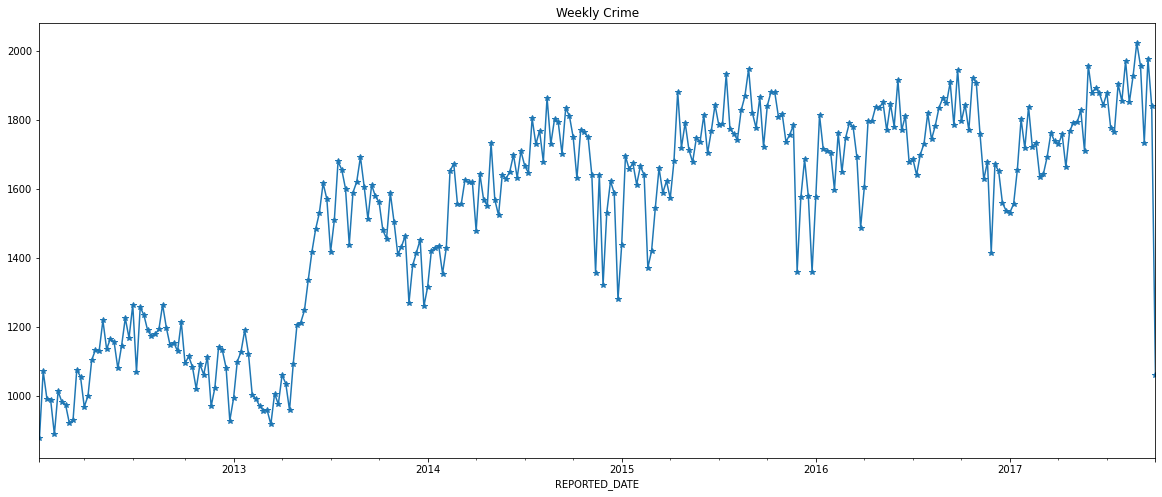

In [79]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20,8))
weekly_crimes.plot(ax=ax,marker = '*', title = 'Weekly Crime')

# **Aggregating weekly crime and traffic accidents separately**
We will use the .resample method to group by each quarter of the year and then sum up the number of crime and traffic accidents separately.

In [80]:
# Use the .resample method to group by each quarter of the year and then sum the 'IS_CRIME' and 'IS_TRAFFIC' columns for each group:
crime_sort.resample('Q')[['IS_CRIME', 'IS_TRAFFIC']].sum().head()

,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,
2012-03-31,7882,4726
2012-06-30,9641,5255
2012-09-30,10566,5003
2012-12-31,9197,4802
2013-03-31,8730,4442


In [82]:
crime_sort.resample('QS')[['IS_CRIME', 'IS_TRAFFIC']].sum().head()

,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,
2012-01-01,7882,4726
2012-04-01,9641,5255
2012-07-01,10566,5003
2012-10-01,9197,4802
2013-01-01,8730,4442


In [0]:
# We can replicate above operation using .groupby method:
tot = crime.groupby(pd.Grouper(freq='Q'))[['IS_CRIME', 'IS_TRAFFIC']].sum()

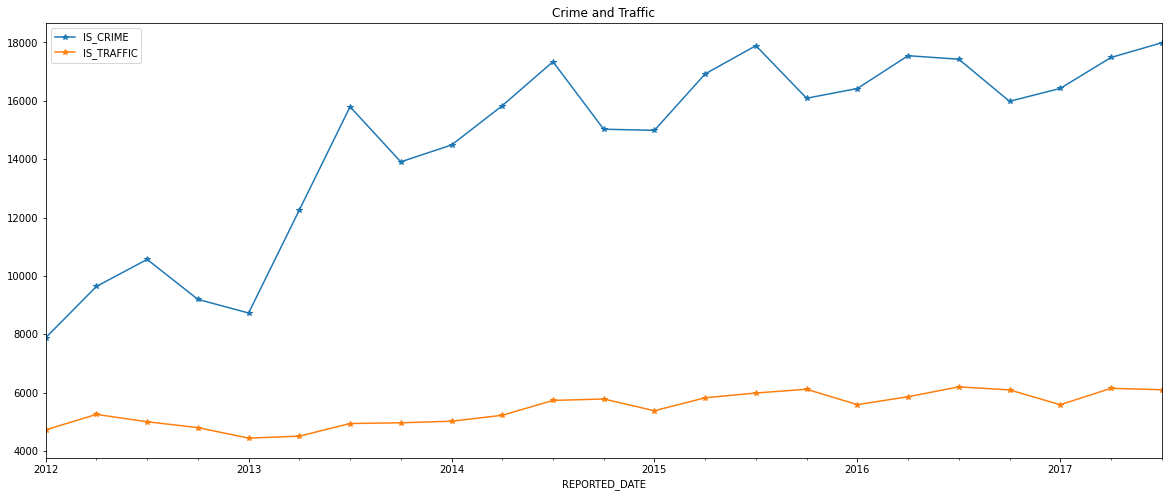

In [88]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20,8))
tot.plot(ax=ax,marker = '*', title = 'Crime and Traffic')

# **Measuring crime by weekday and year**
We will use the .dt attribute to provide us with both the weekday name and year of each crime as a series.

In [91]:
#Find the day name of each REPORTED_DATE and then count these values:
crime.REPORTED_DATE.dt.day_name().value_counts()

Monday       70024
Friday       69621
Wednesday    69538
Thursday     69287
Tuesday      68394
Saturday     58834
Sunday       55213
Name: REPORTED_DATE, dtype: int64

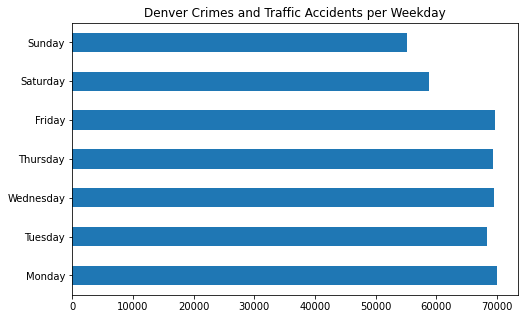

In [98]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
title = 'Denver Crimes and Traffic Accidents per Weekday'
fig, ax = plt.subplots(figsize=(8, 5))
crime.REPORTED_DATE.dt.day_name().value_counts().reindex(days).plot.barh(title = title, ax=ax)

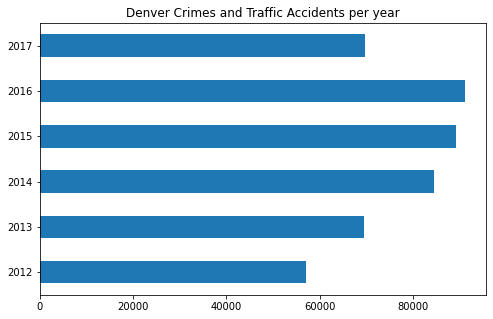

In [102]:
# Count by year
title = 'Denver Crimes and Traffic Accidents per year'
fig, ax = plt.subplots(figsize=(8, 5))
crime.REPORTED_DATE.dt.year.value_counts().sort_index().plot.barh(title = title, ax=ax)

In [111]:
# Group by both weekday and year
crime.groupby([crime.REPORTED_DATE.dt.year.rename('year'), crime.REPORTED_DATE.dt.day_name().rename('day')]).size().unstack('day')

day,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
year,,,,,,,
2012,8549,8786,7442,7189,8440,8191,8440
2013,10380,10627,8875,8444,10431,10416,10354
2014,12683,12813,10950,10278,12309,12440,12948
2015,13273,13452,11586,10624,13512,13381,13320
2016,14059,13708,11467,10554,14050,13338,13900
2017,10677,10638,8514,8124,10545,10628,10576


In [109]:
# Find the last day the we have data for in 2017.
criteria = crime.REPORTED_DATE.dt.year == 2017
crime.loc[criteria, 'REPORTED_DATE'].dt.dayofyear.max()

272

In [112]:
# Increase readability using crosstab() function
crime.assign(year = crime.REPORTED_DATE.dt.year, day = crime.REPORTED_DATE.dt.day_name()).pipe(lambda df_ : pd.crosstab(df_.year, df_.day))

day,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
year,,,,,,,
2012,8549,8786,7442,7189,8440,8191,8440
2013,10380,10627,8875,8444,10431,10416,10354
2014,12683,12813,10950,10278,12309,12440,12948
2015,13273,13452,11586,10624,13512,13381,13320
2016,14059,13708,11467,10554,14050,13338,13900
2017,10677,10638,8514,8124,10545,10628,10576


In [120]:
# Let's update the row for 2017 and change the column order to match the weekday order 
def update_2017(df_):
  df_.loc[2017] = (df_.loc[2017].div(.748).astype('int'))
  return df_
denver_pop = pd.read_csv('https://raw.githubusercontent.com/PacktPublishing/Pandas-Cookbook-Second-Edition/master/data/denver_pop.csv', index_col='Year')
den_100k = denver_pop.div(100_000).squeeze()
# Now let's we take a look at specific types of crimes 'auto-theft'
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
crime_type = 'auto-theft'
normalized = crime.query('OFFENSE_CATEGORY_ID == @crime_type').groupby([crime.REPORTED_DATE.dt.year.rename('year'), crime.REPORTED_DATE.dt.day_name().rename('day')]).size().unstack('day').pipe(
              update_2017).reindex(columns = days).div(den_100k, axis='index').astype(int)    
normalized.head()



day,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
2012,95,72,72,76,71,78,76
2013,85,74,74,69,65,68,67
2014,94,76,72,70,76,67,67
2015,108,102,89,101,92,85,78
2016,119,102,100,99,97,86,85


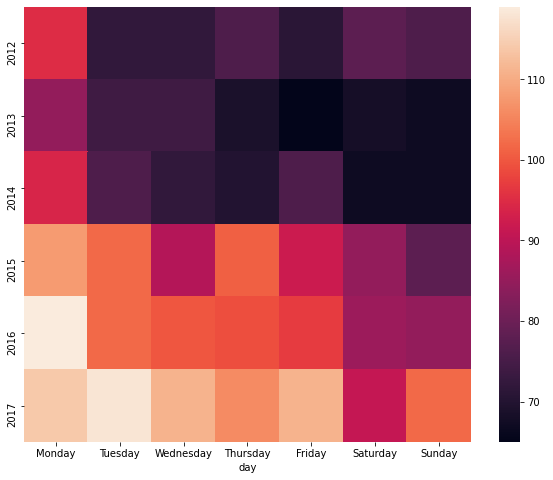

In [122]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(normalized, ax=ax)

# **Grouping with anonymous functions with DatetimeIndex**

In [0]:
crime = crime.sort_index()

In [126]:
crime.index.day_name().value_counts()

Monday       70024
Friday       69621
Wednesday    69538
Thursday     69287
Tuesday      68394
Saturday     58834
Sunday       55213
Name: REPORTED_DATE, dtype: int64

In [127]:
crime.groupby(lambda idx: idx.day_name())[['IS_CRIME', 'IS_TRAFFIC']].sum()

,IS_CRIME,IS_TRAFFIC
Friday,48833,20814
Monday,52158,17895
Saturday,43363,15516
Sunday,42315,12968
Thursday,49470,19845
Tuesday,49658,18755
Wednesday,50054,19508


In [130]:
# We can use a list of functions to groupby both the hour of the day and year and then reshape the table to make it more readable:
funcs = [lambda idx: idx.round('2h').hour, lambda idx: idx.year]
crime.groupby(funcs)[['IS_CRIME', 'IS_TRAFFIC']].sum().unstack()

IS_CRIME                          ... IS_TRAFFIC                        
       2012  2013  2014  2015  2016  ...       2013  2014  2015  2016  2017
0      2422  4040  5649  5649  5377  ...        792   978  1136   980   782
2      1888  3214  4245  4050  4091  ...        652   779   773   718   537
4      1472  2181  2956  2959  3044  ...        378   424   471   464   313
6      1067  1365  1750  2167  2108  ...        399   479   494   593   462
8      2998  3445  3727  4161  4488  ...       1955  2210  2331  2372  1828
10     4305  5035  5658  6205  6218  ...       1901  2139  2320  2303  1873
12     4496  5524  6434  6841  7226  ...       2138  2379  2631  2760  1986
14     4266  5698  6708  7218  6896  ...       2245  2630  2840  2763  1990
16     4113  5889  7351  7643  7926  ...       2562  3002  3160  3527  2784
18     3660  5094  6586  7015  7407  ...       2704  3217  3412  3608  2718
20     3521  4895  6130  6360  6963  ...       1806  1994  2071  2184  1491
22     3078  4318  5496  5626  5637  ...       1330  1532  1671  1472  1072

[12 rows x 12 columns]

In [132]:
crime.groupby(funcs)[['IS_CRIME', 'IS_TRAFFIC']].sum().unstack().style.highlight_max()

# **Grouping by a Timestamp and another column**

In [133]:
employee = pd.read_csv('https://raw.githubusercontent.com/PacktPublishing/Pandas-Cookbook-Second-Edition/master/data/employee.csv', parse_dates = ['JOB_DATE', 'HIRE_DATE'], index_col = 'HIRE_DATE')
employee.head()

,UNIQUE_ID,POSITION_TITLE,DEPARTMENT,BASE_SALARY,RACE,EMPLOYMENT_TYPE,GENDER,EMPLOYMENT_STATUS,JOB_DATE
HIRE_DATE,,,,,,,,,
2006-06-12,0,ASSISTANT DIRECTOR (EX LVL),Municipal Courts Department,121862.0,Hispanic/Latino,Full Time,Female,Active,2012-10-13
2000-07-19,1,LIBRARY ASSISTANT,Library,26125.0,Hispanic/Latino,Full Time,Female,Active,2010-09-18
2015-02-03,2,POLICE OFFICER,Houston Police Department-HPD,45279.0,White,Full Time,Male,Active,2015-02-03
1982-02-08,3,ENGINEER/OPERATOR,Houston Fire Department (HFD),63166.0,White,Full Time,Male,Active,1991-05-25
1989-06-19,4,ELECTRICIAN,General Services Department,56347.0,White,Full Time,Male,Active,1994-10-22


In [134]:
employee.groupby('GENDER')['BASE_SALARY'].mean().round(-2)

GENDER
Female    52200.0
Male      57400.0
Name: BASE_SALARY, dtype: float64

In [135]:
# Let's find the average salary based on hire date and group everyone into 10 year buckets:
employee.resample('10AS')['BASE_SALARY'].mean().round(-2)

HIRE_DATE
1958-01-01     81200.0
1968-01-01    106500.0
1978-01-01     69600.0
1988-01-01     62300.0
1998-01-01     58200.0
2008-01-01     47200.0
Freq: 10AS-JAN, Name: BASE_SALARY, dtype: float64

In [137]:
# Groupby both Gender and a ten-year time span
employee.groupby('GENDER').resample('10AS')['BASE_SALARY'].mean().round(-2)

GENDER  HIRE_DATE 
Female  1975-01-01     51600.0
        1985-01-01     57600.0
        1995-01-01     55500.0
        2005-01-01     51700.0
        2015-01-01     38600.0
Male    1958-01-01     81200.0
        1968-01-01    106500.0
        1978-01-01     72300.0
        1988-01-01     64600.0
        1998-01-01     59700.0
        2008-01-01     47200.0
Name: BASE_SALARY, dtype: float64

In [138]:
employee.groupby('GENDER').resample('10AS')['BASE_SALARY'].mean().unstack('GENDER')

GENDER,Female,Male
HIRE_DATE,,
1958-01-01,NaN,81239.000000
1968-01-01,NaN,106477.333333
1975-01-01,51617.200000,NaN
1978-01-01,NaN,72266.225000
1985-01-01,57556.887850,NaN
1988-01-01,NaN,64626.056940
1995-01-01,55535.573643,NaN
1998-01-01,NaN,59669.771084
2005-01-01,51659.858779,NaN


In [139]:
# Find the dates of first and last hires
employee[employee.GENDER == 'Male'].index.min(), employee[employee.GENDER == 'Female'].index.min()

(Timestamp('1958-12-29 00:00:00'), Timestamp('1975-06-09 00:00:00'))

In [140]:
employee.groupby(['GENDER', pd.Grouper(freq = '10AS')])['BASE_SALARY'].mean()

GENDER  HIRE_DATE 
Female  1968-01-01              NaN
        1978-01-01     57072.461538
        1988-01-01     57117.769841
        1998-01-01     54738.440678
        2008-01-01     47305.262097
Male    1958-01-01     81239.000000
        1968-01-01    106477.333333
        1978-01-01     72266.225000
        1988-01-01     64626.056940
        1998-01-01     59669.771084
        2008-01-01     47201.824131
Name: BASE_SALARY, dtype: float64

In [141]:
employee.groupby(['GENDER', pd.Grouper(freq = '10AS')])['BASE_SALARY'].mean().unstack('GENDER')


GENDER,Female,Male
HIRE_DATE,,
1958-01-01,NaN,81239.000000
1968-01-01,NaN,106477.333333
1978-01-01,57072.461538,72266.225000
1988-01-01,57117.769841,64626.056940
1998-01-01,54738.440678,59669.771084
2008-01-01,47305.262097,47201.824131


# **Visualize Time Series Data**

In [149]:
meat = pd.read_csv('https://assets.datacamp.com/production/repositories/1259/datasets/1e1cd4384a858ebd0a47d995bb0b963bfee09afd/ch4_meat.csv', parse_dates= ['date']).set_index('date')
meat.head()

,beef,veal,pork,lamb_and_mutton,broilers,other_chicken,turkey
date,,,,,,,
1944-01-01,751.0,85.0,1280.0,89.0,NaN,NaN,NaN
1944-02-01,713.0,77.0,1169.0,72.0,NaN,NaN,NaN
1944-03-01,741.0,90.0,1128.0,75.0,NaN,NaN,NaN
1944-04-01,650.0,89.0,978.0,66.0,NaN,NaN,NaN
1944-05-01,681.0,106.0,1029.0,78.0,NaN,NaN,NaN


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:3

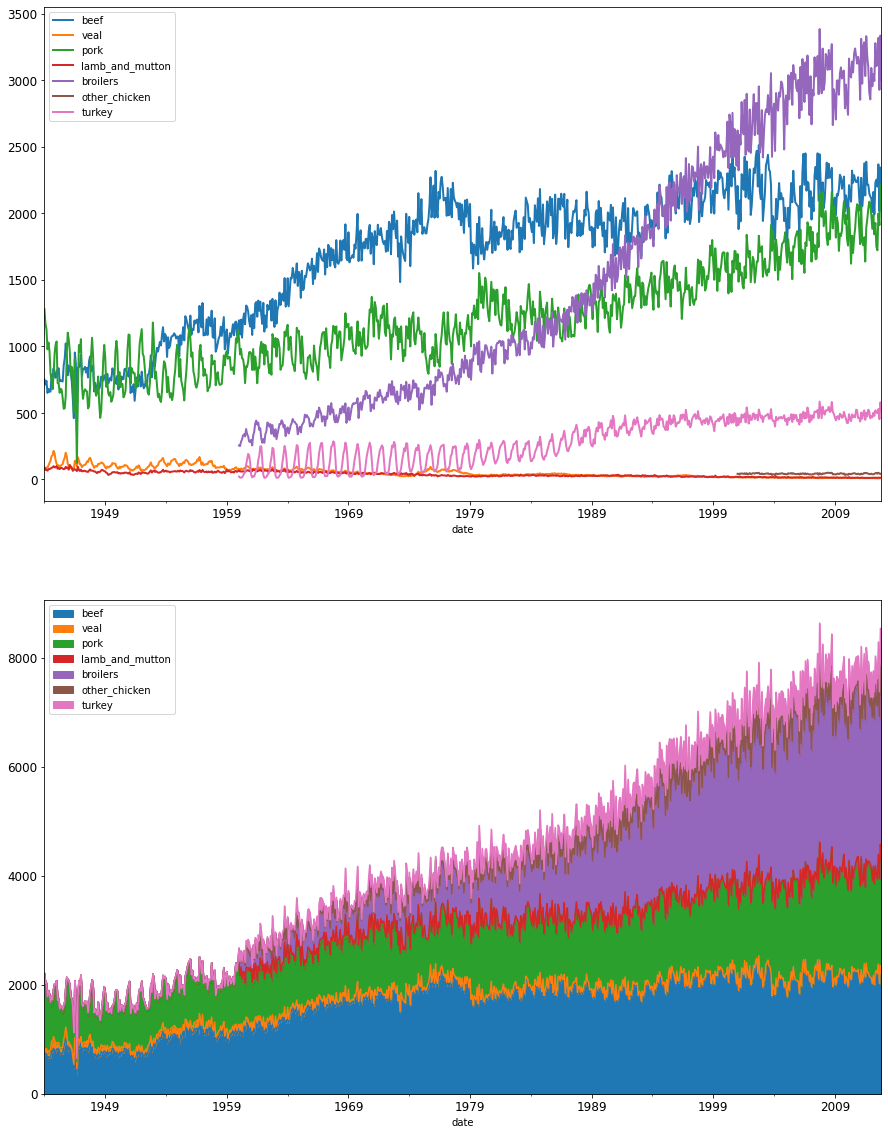

In [159]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (15, 20))
meat.plot(linewidth = 2, fontsize=12, ax=ax1)
meat.plot.area( fontsize=12, ax=ax2)

ax.set_xlabel('Date')
ax.legend(fontsize = 15)
plt.show()

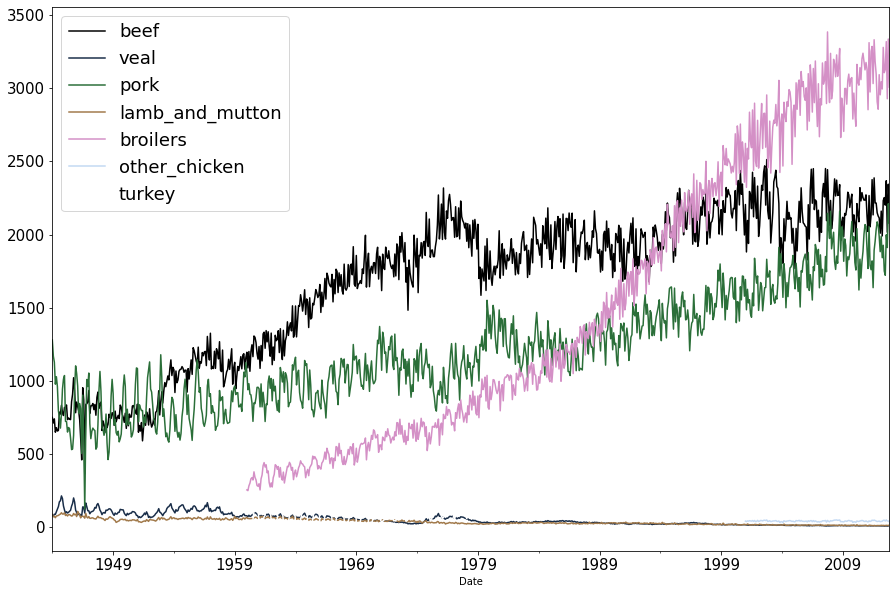

In [161]:
# Define the color palette of the plots
fig, ax = plt.subplots(figsize = (15, 10))
meat.plot(colormap = 'cubehelix', fontsize=15, ax=ax)

ax.set_xlabel('Date')
ax.legend(fontsize = 18)
plt.show()

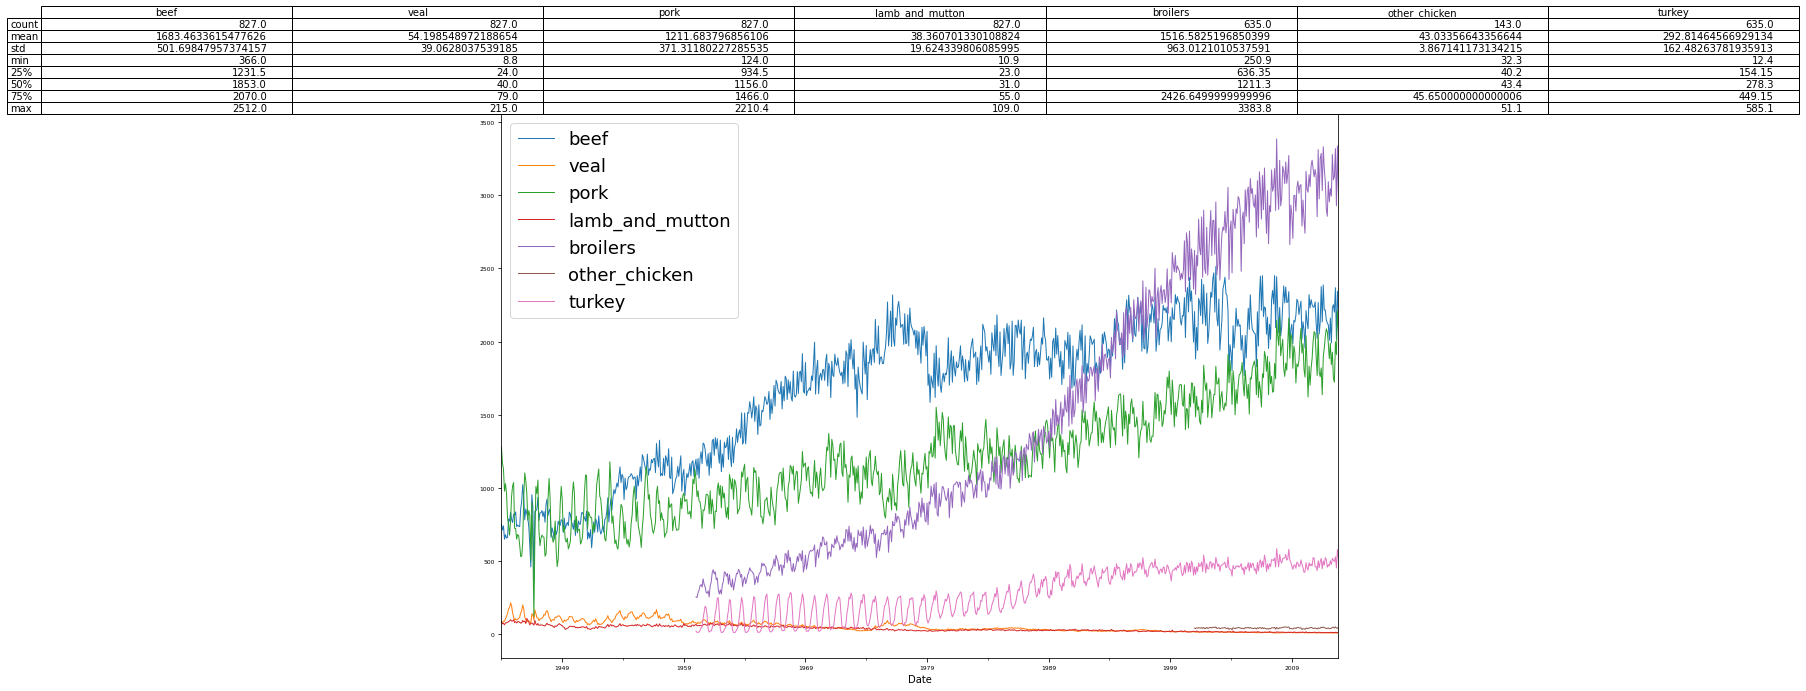

In [162]:
# Add summary statistics to the time series plot.
fig, ax = plt.subplots(figsize = (15, 10))
meat.plot(fontsize=6, linewidth=1, ax=ax)
meat_summary = meat.describe()
ax.table(cellText=meat_summary.values,
         #Specify width of the table
         colWidths = [0.3] * len(meat_summary.columns), 
         #Sepcify row labels
         rowLabels = meat_summary.index, 
         #Specify columns labels
         colLabels = meat_summary.columns, 
         #Specify location of the table
         loc = 'top')
ax.set_xlabel('Date')
ax.legend(fontsize = 18)
plt.show()

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:3

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4e6b7d29e8>,
      dtype=object)

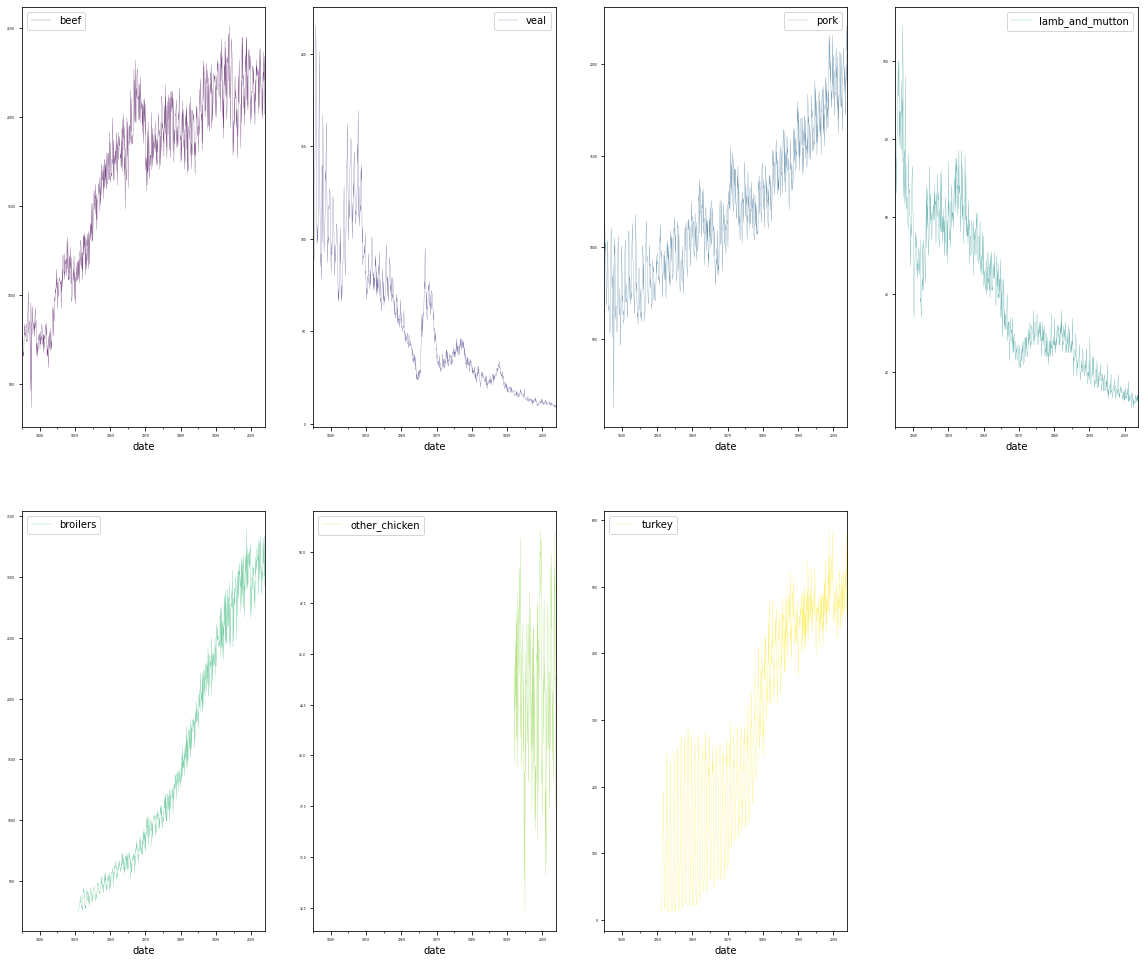

In [171]:
# Plot the time series on individual plots
meat.plot(subplots=True, layout = (2,4), sharex=False, sharey=False, colormap='viridis', fontsize=3, legend=True, linewidth=0.2,figsize = (20, 17))

In [172]:
# Correlations between time series
meat[['beef', 'pork']].corr(method = 'spearman')

,beef,pork
beef,1.000000,0.827587
pork,0.827587,1.000000


In [173]:
meat[['pork', 'veal', 'turkey']].corr(method = 'pearson')

,pork,veal,turkey
pork,1.000000,-0.808834,0.835215
veal,-0.808834,1.000000,-0.768366
turkey,0.835215,-0.768366,1.000000


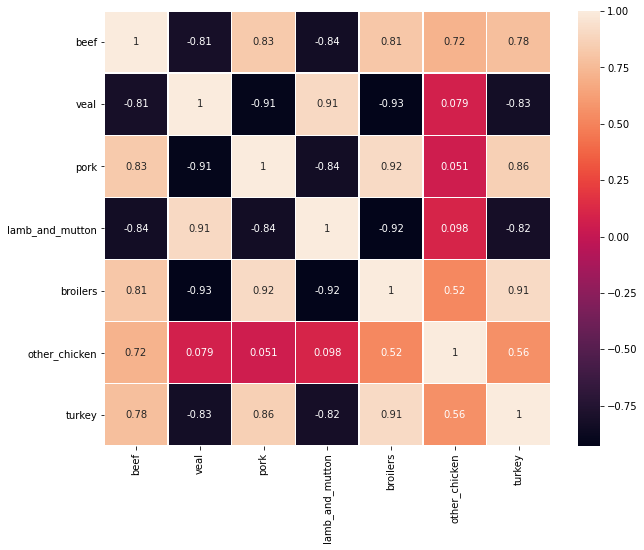

In [177]:
import seaborn as sns
fig, ax = plt.subplots(figsize = (10, 8))

corr_meat = meat.corr(method='spearman')
sns.heatmap(corr_meat, annot=True, linewidths=0.4, ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0) 
plt.show()

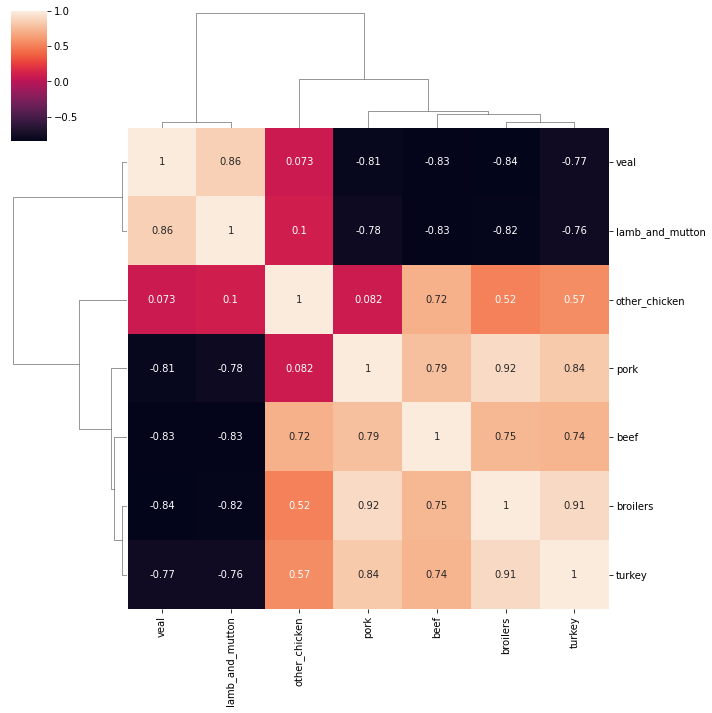

In [182]:
# Clustered Heatmap

corr_ = meat.corr(method='pearson')
sns.clustermap(corr_, annot = True, figsize = (10, 10))
plt.xticks(rotation=90)
plt.yticks(rotation=0) 
plt.show()

# **Plot Autocorrelation and Partial Autocorrelation**
Autocorrelation is measured as the correlation between a time series and a delayed copy of itself. It is used to find repetitive patterns or periodic signal in time series.

In [8]:
co2_levels = pd.read_csv('https://assets.datacamp.com/production/repositories/1259/datasets/88073ba2ec84224b732314d97b9862b049930f32/ch2_co2_levels.csv')
co2_levels.dtypes

datestamp     object
co2          float64
dtype: object

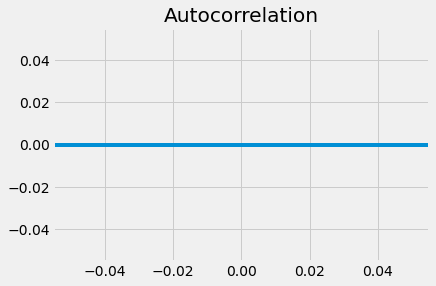

In [11]:
import matplotlib.pyplot as plt
from statsmodels.graphics import tsaplots
plt.style.use('fivethirtyeight')
fig = tsaplots.plot_acf(co2_levels['co2'], lags=24)
plt.show()

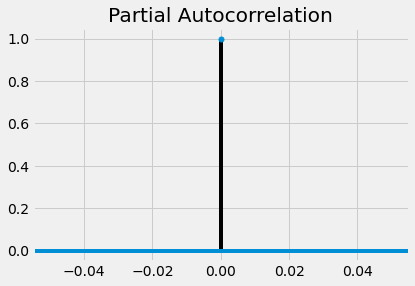

In [12]:
import matplotlib.pyplot as plt
from statsmodels.graphics import tsaplots
plt.style.use('fivethirtyeight')
fig = tsaplots.plot_pacf(co2_levels['co2'], lags=24)
plt.show()

**Time Series Decomposition**

In [13]:
import statsmodels.api as sm 
decomposition = sm.tsa.seasonal_decompose(co2_levels)
decomposition.seasonal

AttributeError: ignored